In [1]:
import numpy as np
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.metrics import classification_report
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import re


[nltk_data] Downloading package wordnet to /home/leoasad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/leoasad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/leoasad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Cargar datos

In [2]:
df = pd.read_csv('../../raw_data/train_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8')
df.shape

(107, 12)

In [8]:
df3 = pd.read_csv('../../raw_data/dev_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8')
df3.shape

(35, 12)

In [9]:
df3 = pd.read_csv('../../raw_data/full_test_split.csv',delimiter=',',encoding='utf-8')
df3.shape

(47, 4)

In [10]:
dataset1 = np.array(pd.read_csv('../../raw_data/dev_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8'))[:, 0:2]
dataset2 = np.array(pd.read_csv('../../raw_data/full_test_split.csv',delimiter=',',encoding='utf-8'))[:, 0:2]
dataset3 = np.array(pd.read_csv('../../raw_data/train_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8'))[:, 0:2]

In [11]:
dataset2.shape

(47, 2)

In [12]:
dataset = np.concatenate((dataset1, np.concatenate((dataset2, dataset3))))


In [15]:
pos = []
neg = []

In [16]:
def checkPosNeg(dataset, index):
    for i in range(0, len(dataset)):
        if(dataset[i][0] == index):
            return dataset[i][1]
    return 0

In [17]:
for i in range(len(dataset)):
        if(dataset[i][1] == 1):
            neg.append(dataset[i][0])
        else:
            pos.append(dataset[i][0])
            
pos = np.array(pos)
neg = np.array(neg)

In [18]:
pos.shape, neg.shape

((133,), (56,))

In [19]:
df = pd.read_csv("../../raw_data/transcripts/300_TRANSCRIPT.csv",delimiter='\t',encoding='utf-8')
df.head()

,start_time,stop_time,speaker,value
0,36.588,39.668,Ellie,hi i'm ellie thanks for coming in today
1,39.888,43.378,Ellie,i was created to talk to people in a safe and ...
2,43.728,48.498,Ellie,think of me as a friend i don't judge i can't ...
3,49.188,52.388,Ellie,i'm here to learn about people and would love ...
4,52.658,58.958,Ellie,i'll ask a few questions to get us started and...


In [20]:
Data = []
Y = []
Data_test = []
Y_test = []
index = -1
for i in range(0, len(dataset3)):
    val = checkPosNeg(dataset, dataset3[i][0])
    Y.append(val)
    fileName = '../../raw_data/transcripts/' + str(int(dataset3[i][0])) + "_TRANSCRIPT.csv"
    
    #print(fileName)
    Data.append(np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8'))[:, 2:4])

Y_val = []
Data_val = []
for i in range(0, len(dataset1)):
    val = checkPosNeg(dataset, dataset1[i][0])
    Y_val.append(val)
    fileName = '../../raw_data/transcripts/' + str(int(dataset1[i][0])) + "_TRANSCRIPT.csv"
    Data_val.append(np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8'))[:, 2:4])

In [21]:
for i in range(0, len(dataset2)):
    Y_test.append(checkPosNeg(dataset, dataset2[i][0]))
    fileName = '../../raw_data/transcripts/' + str(int(dataset2[i][0])) + "_TRANSCRIPT.csv"
    Data_test.append(np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8'))[:, 2:4])


In [22]:
Y = np.array(Y)
Data2 = []
Data2_val = []
Data2_test = []
Y_test = np.array(Y_test)
Y_val = np.array(Y_val)

In [23]:
np.unique(Y_test, return_counts = True), np.unique(Y, return_counts = True), np.unique(Y_val, return_counts = True)

((array([0., 1.]), array([33, 14])),
 (array([0., 1.]), array([77, 30])),
 (array([0., 1.]), array([23, 12])))

In [24]:
np.unique(Y_test, return_counts = True), np.unique(Y, return_counts = True), np.unique(Y_val, return_counts = True)

((array([0., 1.]), array([33, 14])),
 (array([0., 1.]), array([77, 30])),
 (array([0., 1.]), array([23, 12])))

In [25]:
for i in range(0, len(Data)):
    script = []
    for k in range(1, len(Data[i])):
        if(Data[i][k][0] == "Participant"):
            script.append(Data[i][k][1])
    Data2.append(script)
    
for i in range(0, len(Data_test)):
    script = []
    for k in range(1, len(Data_test[i])):
        if(Data_test[i][k][0] == "Participant"):
            script.append(Data_test[i][k][1])
    Data2_test.append(script)

for i in range(0, len(Data_val)):
    script = []
    for k in range(1, len(Data_val[i])):
        if(Data_val[i][k][0] == "Participant"):
            script.append(Data_val[i][k][1])
    Data2_val.append(script)
        
Data2 = np.array(Data2)
Data2_test = np.array(Data2_test)
Data2_val = np.array(Data2_val)

# Limpieza de Datos

In [72]:
# %run preprocessing.ipynb


In [26]:
def stop_words_and_lemmatizer(text):
    """ Remove Stop words from text """
    stopwords = nltk.corpus.stopwords.words('english')
    # stopwords.append('https')
    # stopwords.append('com')
    # stopwords.append('http')
    # stopwords.append('twitter')
    stopwords.append('m')
    stopwords.append('yes')
    stopwords.append('uh')
    stopwords.append('eh')
    
    stop_words = set(stopwords)
    
    word_tokens = nltk.word_tokenize(text) 
    
    without_stopwords = [w for w in word_tokens if not w in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    
    lemmatized = [lemmatizer.lemmatize(word) for word in without_stopwords]
    
    return ' '.join(lemmatized)

In [30]:
def to_lower(text):
    return text.lower()

In [31]:
def remove_context_symbol(text):
    import re
    return re.sub('<[^>]+>', '', text)

In [32]:
def remove_bad_symbols(text):
    """Remove unwanted symbols from text"""
    bad_symbols = re.compile('[^0-9a-z #+_]')
    return bad_symbols.sub(' ', text)

In [33]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')  
    return text

In [29]:
def expand_contractions(text):
    """ Replace contractions in the english language by the complete phrase"""
    # Contraction list
    contractions = {
      "ain't": "am not",
      "aren't": "are not",
      "can't": "cannot",
      "can't've": "cannot have",
      "'cause": "because",
      "could've": "could have",
      "couldn't": "could not",
      "couldn't've": "could not have",
      "didn't": "did not",
      "doesn't": "does not",
      "don't": "do not",
      "hadn't": "had not",
      "hadn't've": "had not have",
      "hasn't": "has not",
      "haven't": "have not",
      "he'd": "he would",
      "he'd've": "he would have",
      "he'll": "he will",
      "he'll've": "he will have",
      "he's": "he is",
      "how'd": "how did",
      "how'd'y": "how do you",
      "how'll": "how will",
      "how's": "how is",
      "I'd": "I would",
      "I'd've": "I would have",
      "I'll": "I will",
      "I'll've": "I will have",
      "I'm": "I am",
      "I've": "I have",
      "isn't": "is not",
      "it'd": "it had",
      "it'd've": "it would have",
      "it'll": "it will",
      "it'll've": "it will have",
      "it's": "it is",
      "let's": "let us",
      "ma'am": "madam",
      "mayn't": "may not",
      "might've": "might have",
      "mightn't": "might not",
      "mightn't've": "might not have",
      "must've": "must have",
      "mustn't": "must not",
      "mustn't've": "must not have",
      "needn't": "need not",
      "needn't've": "need not have",
      "o'clock": "of the clock",
      "oughtn't": "ought not",
      "oughtn't've": "ought not have",
      "shan't": "shall not",
      "sha'n't": "shall not",
      "shan't've": "shall not have",
      "she'd": "she would",
      "she'd've": "she would have",
      "she'll": "she will",
      "she'll've": "she will have",
      "she's": "she is",
      "should've": "should have",
      "shouldn't": "should not",
      "shouldn't've": "should not have",
      "so've": "so have",
      "so's": "so is",
      "that'd": "that would",
      "that'd've": "that would have",
      "that's": "that is",
      "there'd": "there had",
      "there'd've": "there would have",
      "there's": "there is",
      "they'd": "they would",
      "they'd've": "they would have",
      "they'll": "they will",
      "they'll've": "they will have",
      "they're": "they are",
      "they've": "they have",
      "to've": "to have",
      "wasn't": "was not",
      "we'd": "we had",
      "we'd've": "we would have",
      "we'll": "we will",
      "we'll've": "we will have",
      "we're": "we are",
      "we've": "we have",
      "weren't": "were not",
      "what'll": "what will",
      "what'll've": "what will have",
      "what're": "what are",
      "what's": "what is",
      "what've": "what have",
      "when's": "when is",
      "when've": "when have",
      "where'd": "where did",
      "where's": "where is",
      "where've": "where have",
      "who'll": "who will",
      "who'll've": "who will have",
      "who's": "who is",
      "who've": "who have",
      "why's": "why is",
      "why've": "why have",
      "will've": "will have",
      "won't": "will not",
      "won't've": "will not have",
      "would've": "would have",
      "wouldn't": "would not",
      "wouldn't've": "would not have",
      "y'all": "you all",
      "y'alls": "you alls",
      "y'all'd": "you all would",
      "y'all'd've": "you all would have",
      "y'all're": "you all are",
      "y'all've": "you all have",
      "you'd": "you had",
      "you'd've": "you would have",
      "you'll": "you will",
      "you'll've": "you will have",
      "you're": "you are",
      "you've": "you have"}
    
    contractions = dict((k.lower(), v.lower()) for k,v in contractions.items())

    c_re = re.compile('(%s)' % '|'.join(contractions.keys()))
    
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

In [34]:
import string 
from nltk.stem import WordNetLemmatizer

for n in range(len(Data2)):
  Data2[n] = to_lower(str(Data2[n]))
  Data2[n] = expand_contractions(str(Data2[n]))
  Data2[n] = remove_context_symbol(str(Data2[n]))
  Data2[n] = remove_bad_symbols(str(Data2[n]))
  Data2[n] = remove_punctuation(str(Data2[n]))
  Data2[n] = stop_words_and_lemmatizer(str(Data2[n]))

In [35]:
for n in range(len(Data2_test)):
  Data2_test[n] = to_lower(str(Data2_test[n]))
  Data2_test[n] = expand_contractions(str(Data2_test[n]))
  Data2_test[n] = remove_context_symbol(str(Data2_test[n]))
  Data2_test[n] = remove_bad_symbols(str(Data2_test[n]))
  Data2_test[n] = remove_punctuation(str(Data2_test[n]))
  Data2_test[n] = stop_words_and_lemmatizer(str(Data2_test[n]))

In [36]:
for n in range(len(Data2_val)):
  Data2_val[n] = to_lower(str(Data2_val[n]))
  Data2_val[n] = expand_contractions(str(Data2_val[n]))
  Data2_val[n] = remove_context_symbol(str(Data2_val[n]))
  Data2_val[n] = remove_bad_symbols(str(Data2_val[n]))
  Data2_val[n] = remove_punctuation(str(Data2_val[n]))
  Data2_val[n] = stop_words_and_lemmatizer(str(Data2_val[n]))

In [59]:
X_train = Data2
X_val = Data2_val
X_test = Data2_test

In [40]:
print(len(X_train), len(X_val), len(X_test))

107 35 47


# Tokenizar

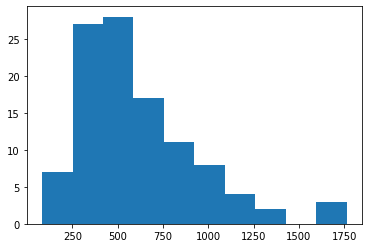

In [63]:
import matplotlib.pyplot as plt

plt.hist([len(interview) for interview in X_train_tokenized]);

In [73]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
y_train = lb.fit_transform(Y)
y_val = lb.fit_transform(Y_val)
y_test = lb.fit_transform(Y_test)

In [74]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

In [64]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(X_train)

#Train
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_tokenized, value=-1000, dtype='float64')

#Test
#tokenizer.fit_on_texts(X_test)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_tokenized, maxlen = X_train_pad.shape[1], value=-1000, dtype='float64')

#Validation
#tokenizer.fit_on_texts(X_val)
X_val_tokenized = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_tokenized, maxlen = X_train_pad.shape[1], value=-1000, dtype='float64')

In [69]:
print(X_train_pad.shape, X_val_pad.shape, X_test_pad.shape)

(107, 1348) (35, 1348) (47, 1348)


# Se agreaga una dimensión mas para que funcione el modelo

In [70]:
X_train_reshaped = np.reshape(X_train_pad, (X_train_pad.shape[0], 1, X_train_pad.shape[1]))
X_val_reshaped = np.reshape(X_val_pad, (X_val_pad.shape[0], 1, X_val_pad.shape[1]))
X_test_reshaped = np.reshape(X_test_pad, (X_test_pad.shape[0], 1, X_test_pad.shape[1]))

In [71]:
print(X_train_reshaped.shape, X_val_reshaped.shape, X_test_reshaped.shape)

(107, 1, 1348) (35, 1, 1348) (47, 1, 1348)


In [72]:
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 5175


# Modelado

In [83]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, Dense, Dropout
from keras.layers import Input

def init_model_2():
  model = Sequential()
  #input = Input(shape=(142, 1353))
  initial_learning_rate = 0.001
  lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=2000, decay_rate=0.5)
  adam = Adam(learning_rate=lr_schedule)
  model.add(layers.Masking(mask_value=-1000))
  #model.add(layers.Embedding(500, 7059, input_length = X.shape[1]))
  model.add(layers.GRU(512, return_sequences=True, activation='tanh')) #input_shape = [1, 1353]))
  model.add(layers.GRU(256, return_sequences=True, activation='tanh'))
  model.add(layers.GRU(128, return_sequences=True, activation='tanh'))
  model.add(layers.GRU(256, return_sequences=True, activation='tanh'))
  model.add(layers.GRU(128, return_sequences=True, activation='tanh', dropout=0.03))
  model.add(layers.GRU(64, return_sequences=True, activation='tanh', dropout=0.02))
  model.add(layers.GRU(32, return_sequences=True, activation='tanh',dropout=0.01))
  model.add(layers.Flatten())
  model.add(Dense(16, activation = 'tanh'))
  model.add(Dense(1, activation = 'sigmoid'))
  
  model.compile(
      optimizer=adam,
      loss="binary_crossentropy",
      metrics=['accuracy', 'AUC','Precision','Recall'])

  return model

In [84]:
model = init_model_2()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3, restore_best_weights=True)

history_fit = model.fit(X_train_reshaped, y_train, 
          batch_size = 32,
          epochs=100,
          validation_data = (X_val_reshaped, Y_val),
          #callbacks=[es],
          verbose = 1)

Epoch 1/100
4/4 [==============================] - 37s 3s/step - loss: 0.6806 - accuracy: 0.5794 - auc: 0.5561 - precision: 0.2581 - recall: 0.2667 - val_loss: 0.6529 - val_accuracy: 0.6571 - val_auc: 0.8025 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 67ms/step - loss: 0.6171 - accuracy: 0.7290 - auc: 0.4996 - precision: 1.0000 - recall: 0.0333 - val_loss: 0.6728 - val_accuracy: 0.6571 - val_auc: 0.7862 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 57ms/step - loss: 0.5991 - accuracy: 0.7290 - auc: 0.3615 - precision: 1.0000 - recall: 0.0333 - val_loss: 0.6730 - val_accuracy: 0.6571 - val_auc: 0.7228 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 1s 392ms/step - loss: 0.5929 - accuracy: 0.7290 - auc: 0.4703 - precision: 1.0000 - recall: 0.0333 - val_loss: 0.6649 - val_accuracy: 0.6571 - val_auc: 0.5000 - val

4/4 [==============================] - 0s 83ms/step - loss: 0.3992 - accuracy: 0.8411 - auc: 0.8669 - precision: 0.7241 - recall: 0.7000 - val_loss: 0.9725 - val_accuracy: 0.5714 - val_auc: 0.3333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 33/100
4/4 [==============================] - 0s 77ms/step - loss: 0.4132 - accuracy: 0.8224 - auc: 0.8498 - precision: 0.7200 - recall: 0.6000 - val_loss: 1.0612 - val_accuracy: 0.6571 - val_auc: 0.3152 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 34/100
4/4 [==============================] - 0s 81ms/step - loss: 0.5479 - accuracy: 0.7570 - auc: 0.9039 - precision: 1.0000 - recall: 0.1333 - val_loss: 0.9328 - val_accuracy: 0.6286 - val_auc: 0.3370 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 35/100
4/4 [==============================] - 0s 85ms/step - loss: 0.4893 - accuracy: 0.7757 - auc: 0.8039 - precision: 0.5833 - recall: 0.7000 - val_loss: 0.8586 - val_accuracy: 0.5429 - val_auc: 0.3913 - val_precisio

Epoch 64/100
4/4 [==============================] - 0s 66ms/step - loss: 0.2771 - accuracy: 0.8879 - auc: 0.9426 - precision: 0.9091 - recall: 0.6667 - val_loss: 1.4493 - val_accuracy: 0.5429 - val_auc: 0.2645 - val_precision: 0.3000 - val_recall: 0.2500
Epoch 65/100
4/4 [==============================] - 0s 62ms/step - loss: 0.2689 - accuracy: 0.8879 - auc: 0.9353 - precision: 0.8214 - recall: 0.7667 - val_loss: 1.3950 - val_accuracy: 0.5429 - val_auc: 0.2790 - val_precision: 0.1667 - val_recall: 0.0833
Epoch 66/100
4/4 [==============================] - 0s 59ms/step - loss: 0.2658 - accuracy: 0.8879 - auc: 0.9320 - precision: 0.8750 - recall: 0.7000 - val_loss: 1.5410 - val_accuracy: 0.5429 - val_auc: 0.2554 - val_precision: 0.2500 - val_recall: 0.1667
Epoch 67/100
4/4 [==============================] - 0s 65ms/step - loss: 0.2664 - accuracy: 0.8692 - auc: 0.9318 - precision: 0.8077 - recall: 0.7000 - val_loss: 1.5653 - val_accuracy: 0.5714 - val_auc: 0.2428 - val_precision: 0.2857 -

4/4 [==============================] - 0s 68ms/step - loss: 0.2121 - accuracy: 0.9065 - auc: 0.9634 - precision: 0.9545 - recall: 0.7000 - val_loss: 1.7924 - val_accuracy: 0.5714 - val_auc: 0.2518 - val_precision: 0.3333 - val_recall: 0.2500
Epoch 97/100
4/4 [==============================] - 0s 86ms/step - loss: 0.2347 - accuracy: 0.9065 - auc: 0.9602 - precision: 0.7941 - recall: 0.9000 - val_loss: 1.5350 - val_accuracy: 0.5714 - val_auc: 0.3152 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 98/100
4/4 [==============================] - 0s 79ms/step - loss: 0.4394 - accuracy: 0.8318 - auc: 0.9500 - precision: 1.0000 - recall: 0.4000 - val_loss: 1.6336 - val_accuracy: 0.5714 - val_auc: 0.3080 - val_precision: 0.3333 - val_recall: 0.2500
Epoch 99/100
4/4 [==============================] - 0s 70ms/step - loss: 0.3989 - accuracy: 0.8318 - auc: 0.9299 - precision: 0.6429 - recall: 0.9000 - val_loss: 1.2480 - val_accuracy: 0.6000 - val_auc: 0.2754 - val_precision: 0.2500 - val_

In [96]:
model.summary() #loss: 0.2482 - accuracy: 0.8972 - auc: 0.9550 - precision: 0.8800 - recall: 0.7333 - val_loss: 1.5062 - val_accuracy: 0.6000 - val_auc: 0.3098 - val_precision: 0.2500 - val_recall: 0.0833


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 1, 1348)           0         
                                                                 
 gru_7 (GRU)                 (None, 1, 512)            2860032   
                                                                 
 gru_8 (GRU)                 (None, 1, 256)            591360    
                                                                 
 gru_9 (GRU)                 (None, 1, 128)            148224    
                                                                 
 gru_10 (GRU)                (None, 1, 256)            296448    
                                                                 
 gru_11 (GRU)                (None, 1, 128)            148224    
                                                                 
 gru_12 (GRU)                (None, 1, 64)            

In [183]:
Y_pred = model.predict(X_test)

In [184]:
y_pred = [1 if value[0] >= 0.5 else 0 for value in Y_pred]

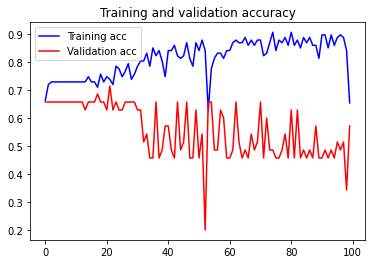

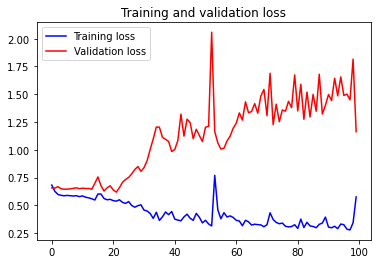

In [106]:
import matplotlib.pyplot as plt
#ploteo con early stop y sin validation, y con Y como int

val_acc = history_fit.history['val_accuracy']
loss = history_fit.history['loss']
val_loss = history_fit.history['val_loss']
acc = history_fit.history['accuracy'] 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()